In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [2]:
file = pd.read_csv("wine.csv")
file.head()

,fixed acidity,volatile acidity,pressure,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,volatality while in solution,sulphates,alcohol,quality,citric,pH
0,7.4,0.70,0,1.9,0.076,11,34,0.9978,2.51,0.56,9.4,5,<0.5,<3
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,<0.5,>=3
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5,<0.5,>=3
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6,>=0.5,>=3
4,7.4,0.70,0,1.9,0.076,11,34,0.9978,2.30,0.56,9.4,5,<0.5,<3


In [3]:
file = file.drop("citric", axis=1)

In [4]:
file.head()

,fixed acidity,volatile acidity,pressure,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,volatality while in solution,sulphates,alcohol,quality,pH
0,7.4,0.70,0,1.9,0.076,11,34,0.9978,2.51,0.56,9.4,5,<3
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,>=3
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5,>=3
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6,>=3
4,7.4,0.70,0,1.9,0.076,11,34,0.9978,2.30,0.56,9.4,5,<3


In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity                   1599 non-null float64
volatile acidity                1599 non-null float64
pressure                        1599 non-null object
residual sugar                  1599 non-null object
chlorides                       1599 non-null object
free sulfur dioxide             1599 non-null object
total sulfur dioxide            1599 non-null object
density                         1599 non-null object
volatality while in solution    1599 non-null float64
sulphates                       1599 non-null object
alcohol                         1599 non-null float64
quality                         1599 non-null int64
pH                              1599 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 162.5+ KB


In [6]:
file = file.rename(columns = {"fixed acidity":"fixed_acidity","volatile acidity":"volatile_acidity","residual sugar":"residual_sugar"
                             ,"free sulfur dioxide":"free_sulfur_dioxide","total sulfur dioxide":"total_sulfur_dioxide",
                             "volatality while in solution":"volatality_while_in_solution"})

In [7]:
file.head()

,fixed_acidity,volatile_acidity,pressure,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,volatality_while_in_solution,sulphates,alcohol,quality,pH
0,7.4,0.70,0,1.9,0.076,11,34,0.9978,2.51,0.56,9.4,5,<3
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,>=3
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5,>=3
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6,>=3
4,7.4,0.70,0,1.9,0.076,11,34,0.9978,2.30,0.56,9.4,5,<3


In [18]:
file = file.drop(file[(file.pressure == '?') | (file.residual_sugar == '?') | (file.chlorides == '?') |
                     (file.free_sulfur_dioxide == "?") | (file.chlorides == '?') | (file.total_sulfur_dioxide == '?') |
                     (file.chlorides == '?') | (file.density == '?') | (file.sulphates == '?')].index, axis=0  )

In [20]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1380 entries, 0 to 1598
Data columns (total 13 columns):
fixed_acidity                   1380 non-null float64
volatile_acidity                1380 non-null float64
pressure                        1380 non-null object
residual_sugar                  1380 non-null object
chlorides                       1380 non-null object
free_sulfur_dioxide             1380 non-null object
total_sulfur_dioxide            1380 non-null object
density                         1380 non-null object
volatality_while_in_solution    1380 non-null float64
sulphates                       1380 non-null object
alcohol                         1380 non-null float64
quality                         1380 non-null int64
pH                              1380 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 150.9+ KB


In [26]:
file["pressure"] = file["pressure"].astype("float64")
file["residual_sugar"] = file["residual_sugar"].astype("float64")
file["chlorides"] = file["chlorides"].astype("float64")
file["free_sulfur_dioxide"] = file["free_sulfur_dioxide"].astype("float64")
file["total_sulfur_dioxide"] = file["total_sulfur_dioxide"].astype("float64")
file["density"] = file["density"].astype("float64")
file["sulphates"] = file["sulphates"].astype("float64")


In [27]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1380 entries, 0 to 1598
Data columns (total 14 columns):
fixed_acidity                   1380 non-null float64
volatile_acidity                1380 non-null float64
pressure                        1380 non-null float64
residual_sugar                  1380 non-null float64
chlorides                       1380 non-null float64
free_sulfur_dioxide             1380 non-null float64
total_sulfur_dioxide            1380 non-null float64
density                         1380 non-null float64
volatality_while_in_solution    1380 non-null float64
sulphates                       1380 non-null float64
alcohol                         1380 non-null float64
quality                         1380 non-null int64
pH                              1380 non-null object
suphates                        1380 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 161.7+ KB


In [28]:
file["pH"].unique()

array(['<3', '>=3'], dtype=object)

In [29]:
file["pH"] = file["pH"].astype("category")

#### Considering pH < 3 as 0 and pH >= 3 as 1

In [31]:
file["pH"] = file["pH"].replace("<3", 0)
file["pH"] = file["pH"].replace(">=3", 1)

In [33]:
file.head()

,fixed_acidity,volatile_acidity,pressure,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,volatality_while_in_solution,sulphates,alcohol,quality,pH,suphates
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,2.51,0.56,9.4,5,0,0.56
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0.65
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,0.58
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,2.30,0.56,9.4,5,0,0.56


### Finding correlation of all attributes with pH

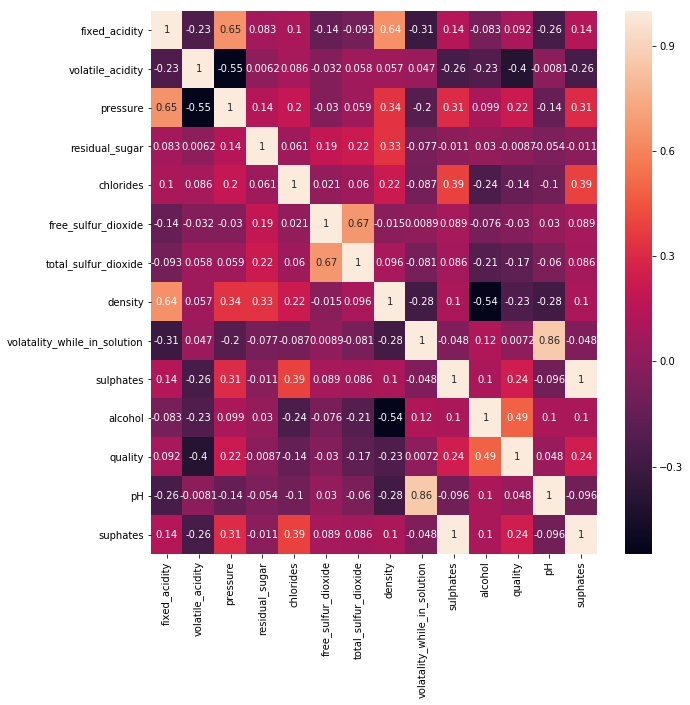

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
corr = file.corr()

# plot the heatmap
sns.heatmap(corr,annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#### The features that correlate to the pH are:

- fixed_acidity
- pressure
- chlorides
- density
- volatility_while_in_solution
- alcohol
- quality

In [37]:
columns = ["fixed_acidity","pressure","chlorides","density","volatality_while_in_solution","alcohol","quality","pH"]
file = file[columns]
file.head()

,fixed_acidity,pressure,chlorides,density,volatality_while_in_solution,alcohol,quality,pH
0,7.4,0.00,0.076,0.9978,2.51,9.4,5,0
1,7.8,0.00,0.098,0.9968,3.20,9.8,5,1
2,7.8,0.04,0.092,0.9970,3.26,9.8,5,1
3,11.2,0.56,0.075,0.9980,3.16,9.8,6,1
4,7.4,0.00,0.076,0.9978,2.30,9.4,5,0


In [82]:
x = file.iloc[:, 0:7].values
y = file.iloc[:,7].values

In [83]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state=0)

In [84]:
from sklearn.cluster import KMeans


In [105]:
kmeans = KMeans(n_clusters = 2, init="k-means++",random_state=0)

In [106]:
ytrain_kmeans = kmeans.fit_predict(x_train)

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, ytrain_kmeans)
cm

array([[110, 104],
       [614, 207]], dtype=int64)

In [109]:
kmeans = KMeans(n_clusters = 2, init="k-means++",random_state=0)
ytest_kmeans = kmeans.fit_predict(x_test)
cm = confusion_matrix(y_test, ytest_kmeans)
cm

array([[ 42,  37],
       [ 75, 191]], dtype=int64)

### Comparing performance of model

#### Accuracy = TP + TN/total number of classifications

In [116]:
### Accuracy of training set
accuracy = (207+110)/(207+110+614+104)
accuracy

0.30628019323671496

In [117]:
### Accuracy of test set
accuracy = (42+191)/(42+191+75+37)
accuracy

0.6753623188405797

#### Precision = TP/(TP + FP)

In [118]:
### Precision of training set
precision = 207/(207+104)
precision

0.6655948553054662

In [119]:
### Precision of test set
precision = 191/(191+37)
precision

0.8377192982456141

#### Recall = TP/(TP+FN)

In [120]:
### Recall of training set
recall = 207/(207+614)
recall

0.25213154689403167

In [121]:
### Recall of test set
recall = 191/(191+75)
recall

0.7180451127819549